
Visit original tutorial page: https://morvanzhou.github.io/tutorials/

Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:

- torch: 0.4

- matplotlib

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1) # reproducile

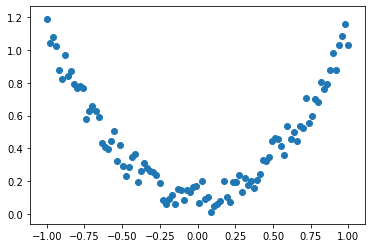

In [4]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) # x data (tensor), shape = (100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                # noisy y data (etnsor), shape=(100,1))


# torch can only train on Variable, so convert them to Variable
# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()


In [31]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_features, n_hidden) # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)  # output layer
        
    def forward(self, x):
        x = F.relu(self.hidden(x))  # activation function for hidden layer
        x = self.predict(x)         # linear output
        return x
    
net2 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
)
    
net = Net(n_features=1, n_hidden=20, n_output=1) # define the network
print(net, "\n", net2) # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr = 0.1)
loss_func = torch.nn.MSELoss() # this is for regression mean squared loss

plt.ion() # something about plotting

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
) 
 Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


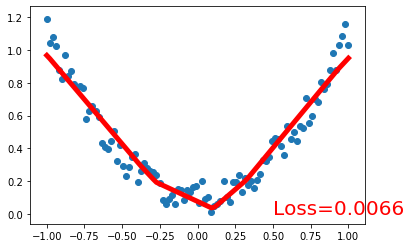

In [32]:
for t in range(200):
    prediction = net(x)
    if t%10 == 0:
#         print(prediction)
        pass
    loss= loss_func(prediction, y) # must be (1. nn output, 2. target)
    
    optimizer.zero_grad()          # clear gradients for next train
    loss.backward()                # backpropagation, compute gradients
    optimizer.step()               # apply gradients, meaning that updating the gradients?
    
    if t%5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size':20, 'color':'red'})
#         plt.pause(0.1)
plt.ioff()
plt.show()